In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os
import random
import cv2
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
data_path = "/content/drive/MyDrive/프로젝트/b/"
data_dir = pathlib.Path(data_path)

In [ ]:
train_ds = image_dataset_from_directory(
    data_dir,validation_split=0.25,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    # shuffle=True,
)
valid_ds = image_dataset_from_directory(
    data_dir,validation_split=0.25,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    valid_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 9900 files belonging to 33 classes.
Using 7425 files for training.
Found 9900 files belonging to 33 classes.
Using 2475 files for validation.


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
  layer.trainable = True

In [ ]:
model = Sequential()
# model.add(data_augmentation)
model.add(Rescaling(1./255 ,input_shape=(224,224,3)))
model.add(base_model)
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(33 , activation = 'softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001) , metrics=['accuracy'])

In [ ]:
hist = model.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 1056s 9s/step - loss: 3.4044 - accuracy: 0.0535 - val_loss: 3.1457 - val_accuracy: 0.1172
Epoch 2/20
117/117 [==============================] - 9s 76ms/step - loss: 3.0942 - accuracy: 0.1574 - val_loss: 2.8236 - val_accuracy: 0.2614
Epoch 3/20
117/117 [==============================] - 9s 75ms/step - loss: 2.8344 - accuracy: 0.2280 - val_loss: 2.6405 - val_accuracy: 0.2986
Epoch 4/20
117/117 [==============================] - 10s 82ms/step - loss: 2.6635 - accuracy: 0.2818 - val_loss: 2.5122 - val_accuracy: 0.3378
Epoch 5/20
117/117 [==============================] - 9s 75ms/step - loss: 2.5373 - accuracy: 0.3211 - val_loss: 2.4477 - val_accuracy: 0.3446
Epoch 6/20
117/117 [==============================] - 9s 74ms/step - loss: 2.4322 - accuracy: 0.3576 - val_loss: 2.3874 - val_accuracy: 0.3584
Epoch 7/20
117/117 [==============================] - 9s 74ms/step - loss: 2.3466 - accuracy: 0.3791 - val_loss: 2.3369 - val_accuracy: 0.38

In [ ]:
model.evaluate(ds_train), model.evaluate(ds_valid)

39/39 [==============================] - 1s 30ms/step - loss: 1.4783 - accuracy: 0.6105


([1.2085429430007935, 0.675151526927948],
 [1.4783203601837158, 0.6105050444602966])

In [ ]:
model1 = Sequential()
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model1.add(base_model)
model1.add(Conv2D(16, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D(padding='same'))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D(padding='same'))
model1.add(Conv2D(64, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D(padding='same'))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(33 , activation = 'softmax'))
# model.summary()
model1.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001) , metrics=['accuracy'])

In [ ]:
hist = model1.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 61s 479ms/step - loss: 2.5111 - accuracy: 0.2646 - val_loss: 4.1721 - val_accuracy: 0.2036
Epoch 2/20
117/117 [==============================] - 46s 390ms/step - loss: 1.5262 - accuracy: 0.5397 - val_loss: 1.7323 - val_accuracy: 0.5604
Epoch 3/20
117/117 [==============================] - 45s 381ms/step - loss: 1.0803 - accuracy: 0.6707 - val_loss: 1.2767 - val_accuracy: 0.6493
Epoch 4/20
117/117 [==============================] - 44s 377ms/step - loss: 0.9059 - accuracy: 0.7234 - val_loss: 1.8255 - val_accuracy: 0.6125
Epoch 5/20
117/117 [==============================] - 44s 380ms/step - loss: 0.7149 - accuracy: 0.7776 - val_loss: 1.4225 - val_accuracy: 0.6840
Epoch 6/20
117/117 [==============================] - 45s 382ms/step - loss: 0.6045 - accuracy: 0.8124 - val_loss: 1.6280 - val_accuracy: 0.5665
Epoch 7/20
117/117 [==============================] - 45s 382ms/step - loss: 0.5640 - accuracy: 0.8232 - val_loss: 0.8026 - val_ac

In [ ]:
model1.evaluate(ds_train), model1.evaluate(ds_valid)

39/39 [==============================] - 3s 71ms/step - loss: 0.9568 - accuracy: 0.7798


([1.0295538902282715, 0.7688888907432556],
 [0.9567987322807312, 0.7797979712486267])

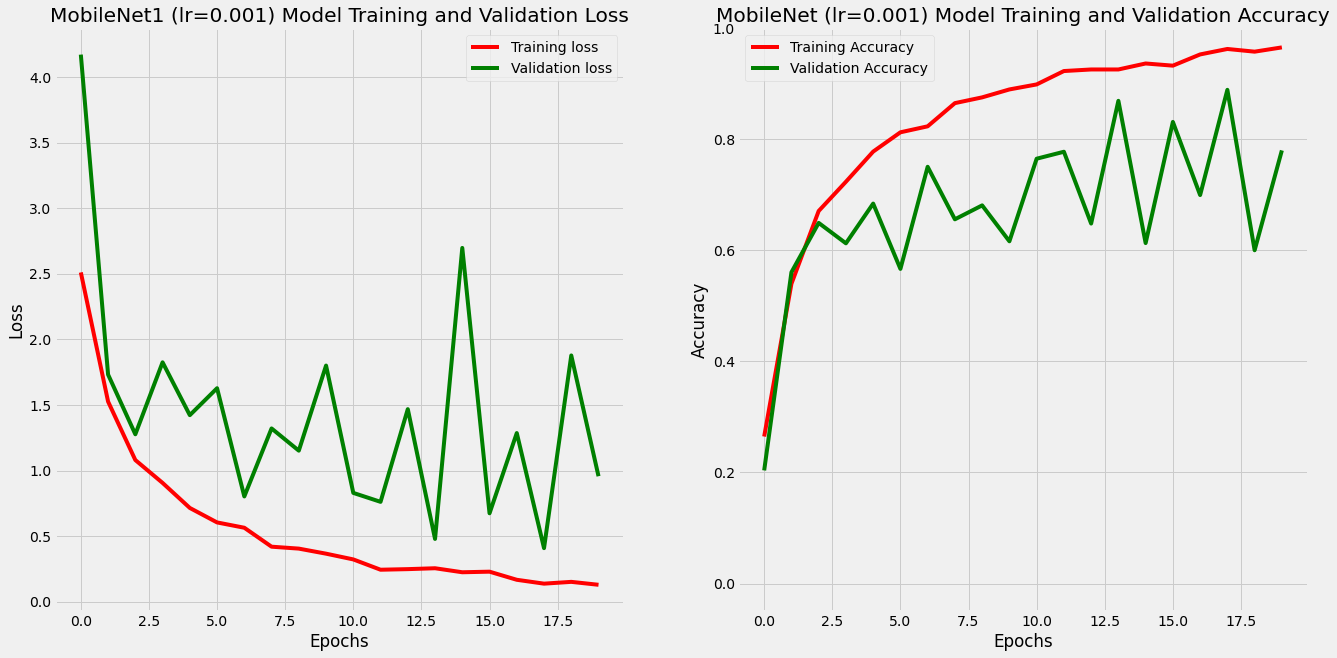

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist.history["loss"], 'r', label='Training loss')
axes[0].plot(hist.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('MobileNet1 (lr=0.001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)
axes[1].plot (hist.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('MobileNet (lr=0.001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/MobileNet (lr=0.001)model_accuracy_loss.jpg")

In [ ]:
# 베이스모델
model2 = Sequential()
model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model2.add(Conv2D(16, 3, padding='same', activation='relu'))
model2.add(MaxPooling2D(padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, 3, padding='same', activation='relu'))
model2.add(MaxPooling2D(padding='same'))
model2.add(Conv2D(64, 3, padding='same', activation='relu'))
model2.add(MaxPooling2D(padding='same'))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(33 , activation = 'softmax'))
# model.summary()
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001) , metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 41s 332ms/step - loss: 3.1944 - accuracy: 0.1185 - val_loss: 2.7133 - val_accuracy: 0.2812
Epoch 2/20
117/117 [==============================] - 9s 74ms/step - loss: 2.6489 - accuracy: 0.2671 - val_loss: 2.5370 - val_accuracy: 0.2986
Epoch 3/20
117/117 [==============================] - 9s 74ms/step - loss: 2.3215 - accuracy: 0.3522 - val_loss: 2.3448 - val_accuracy: 0.3321
Epoch 4/20
117/117 [==============================] - 9s 74ms/step - loss: 2.0691 - accuracy: 0.4251 - val_loss: 2.2179 - val_accuracy: 0.3624
Epoch 5/20
117/117 [==============================] - 9s 74ms/step - loss: 1.9045 - accuracy: 0.4761 - val_loss: 2.0541 - val_accuracy: 0.4065
Epoch 6/20
117/117 [==============================] - 9s 73ms/step - loss: 1.7571 - accuracy: 0.5178 - val_loss: 1.9005 - val_accuracy: 0.4606
Epoch 7/20
117/117 [==============================] - 8s 73ms/step - loss: 1.6257 - accuracy: 0.5576 - val_loss: 1.7907 - val_accuracy: 0.50

In [ ]:
model2.evaluate(ds_train), model2.evaluate(ds_valid)

39/39 [==============================] - 1s 33ms/step - loss: 0.9411 - accuracy: 0.7879


([0.5141890645027161, 0.8499663472175598],
 [0.9410769939422607, 0.7878788113594055])

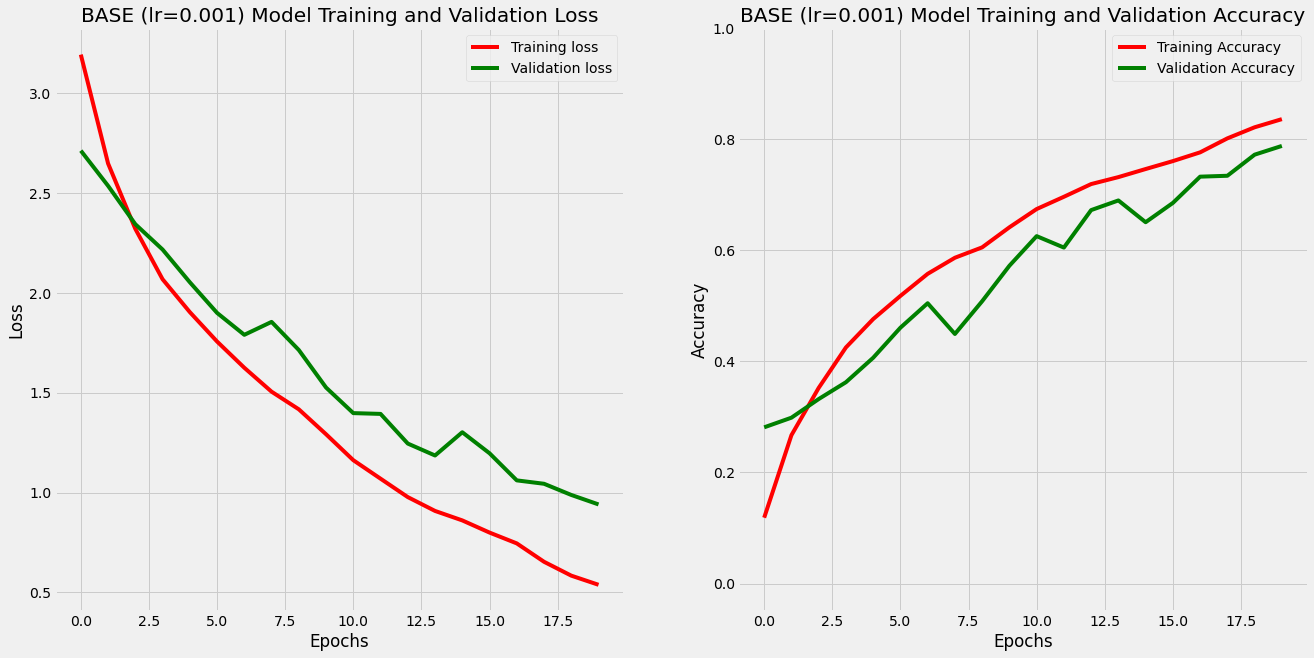

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist2.history["loss"], 'r', label='Training loss')
axes[0].plot(hist2.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('BASE (lr=0.001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (hist2.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist2.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('BASE (lr=0.001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/BASE(lr=0.001)model_accuracy_loss.jpg")

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
  layer.trainable = True

In [ ]:
model3 = Sequential()
model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model3.add(base_model)
model3.add(Conv2D(16, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D(padding='same'))
model3.add(Dropout(0.2))
model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D(padding='same'))
model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D(padding='same'))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(33 , activation = 'softmax'))
model3.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001) , metrics=['accuracy'])


In [ ]:
hist3 = model3.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 62s 478ms/step - loss: 3.3936 - accuracy: 0.0681 - val_loss: 3.5531 - val_accuracy: 0.1152
Epoch 2/20
117/117 [==============================] - 45s 386ms/step - loss: 2.7039 - accuracy: 0.2343 - val_loss: 3.4973 - val_accuracy: 0.0642
Epoch 3/20
117/117 [==============================] - 44s 378ms/step - loss: 1.9135 - accuracy: 0.4502 - val_loss: 3.1930 - val_accuracy: 0.1042
Epoch 4/20
117/117 [==============================] - 45s 389ms/step - loss: 1.4410 - accuracy: 0.5867 - val_loss: 2.3551 - val_accuracy: 0.3491
Epoch 5/20
117/117 [==============================] - 46s 392ms/step - loss: 1.0423 - accuracy: 0.6909 - val_loss: 1.0756 - val_accuracy: 0.7188
Epoch 6/20
117/117 [==============================] - 46s 389ms/step - loss: 0.7831 - accuracy: 0.7632 - val_loss: 0.8121 - val_accuracy: 0.7685
Epoch 7/20
117/117 [==============================] - 45s 384ms/step - loss: 0.5691 - accuracy: 0.8268 - val_loss: 0.5363 - val_ac

In [ ]:
model3.evaluate(ds_train), model3.evaluate(ds_valid)

39/39 [==============================] - 3s 69ms/step - loss: 0.2043 - accuracy: 0.9511


([0.01770494319498539, 0.9951515197753906],
 [0.20431873202323914, 0.9511111378669739])

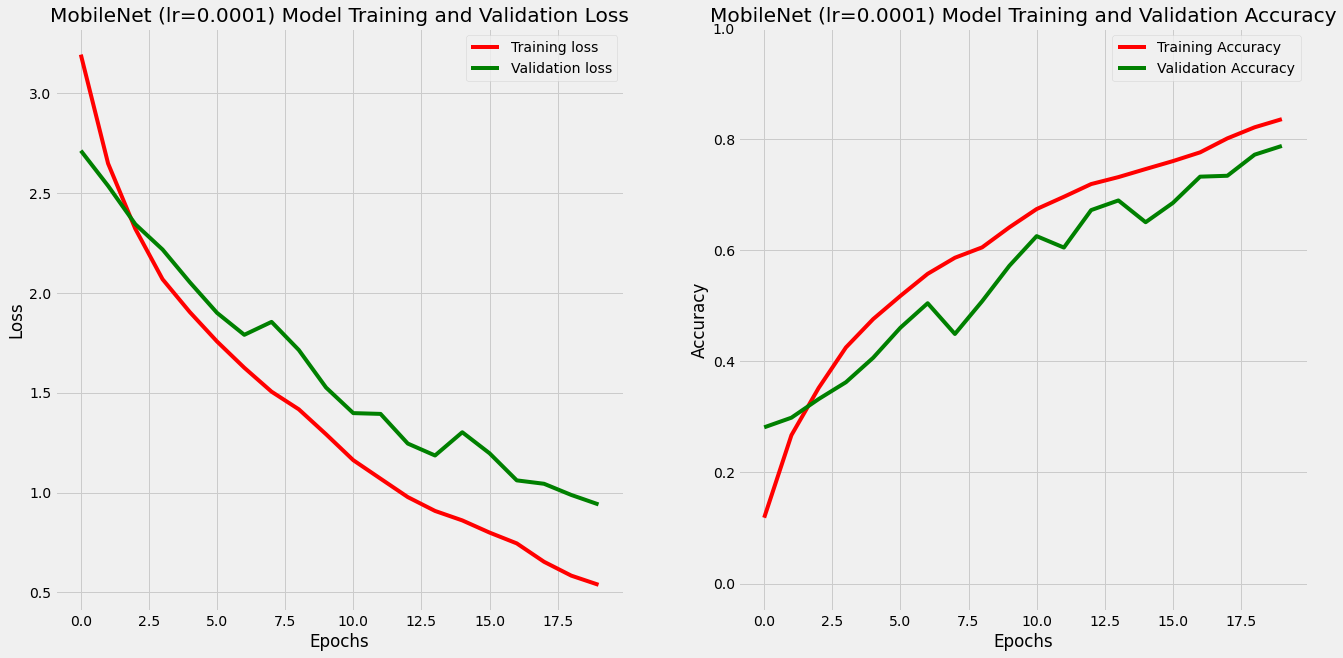

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist2.history["loss"], 'r', label='Training loss')
axes[0].plot(hist2.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('MobileNet (lr=0.0001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (hist2.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist2.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('MobileNet (lr=0.0001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/MobileNet(lr=0.0001)model_accuracy_loss.jpg")

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
num = 1
for layer in base_model.layers:
   if num >= 84:
    layer.trainable = True
   else:
    layer.trainable = False
   num += 1

In [ ]:
model4 = Sequential()
model4.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model4.add(base_model)
model4.add(Conv2D(16, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D(padding='same'))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D(padding='same'))
model4.add(Conv2D(64, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D(padding='same'))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(33 , activation = 'softmax'))
model4.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001) , metrics=['accuracy'])

In [ ]:
hist4= model4.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 52s 410ms/step - loss: 3.5106 - accuracy: 0.0331 - val_loss: 3.5055 - val_accuracy: 4.0404e-04
Epoch 2/20
117/117 [==============================] - 11s 96ms/step - loss: 3.4830 - accuracy: 0.0357 - val_loss: 3.4872 - val_accuracy: 0.0012
Epoch 3/20
117/117 [==============================] - 11s 96ms/step - loss: 3.4223 - accuracy: 0.0479 - val_loss: 3.5002 - val_accuracy: 4.0404e-04
Epoch 4/20
117/117 [==============================] - 11s 96ms/step - loss: 3.3625 - accuracy: 0.0514 - val_loss: 3.5050 - val_accuracy: 0.0024
Epoch 5/20
117/117 [==============================] - 11s 96ms/step - loss: 3.3391 - accuracy: 0.0497 - val_loss: 3.3010 - val_accuracy: 0.0226
Epoch 6/20
117/117 [==============================] - 11s 96ms/step - loss: 3.3303 - accuracy: 0.0520 - val_loss: 3.2555 - val_accuracy: 0.0933
Epoch 7/20
117/117 [==============================] - 11s 96ms/step - loss: 3.2969 - accuracy: 0.0567 - val_loss: 3.2160 - val_

In [ ]:
num = 1
for layer in base_model.layers:
  if 'conv2d.Conv2D' in str(layer):
    print(layer, num)
  num += 1

<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff0633fbb0> 2
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff06447190> 8
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff08201c70> 15
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff0619dc40> 21
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff0823bac0> 28
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff062c3100> 34
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff062e9c70> 41
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff062c3340> 47
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff08277340> 53
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff0624c580> 59
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff0624c7f0> 65
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff06332220> 71
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff06273880> 78
<keras.layers.convolutional.conv2d.Conv2D object at 0x7eff060f91c0> 84


In [ ]:
model4.evaluate(ds_train), model4.evaluate(ds_valid)

39/39 [==============================] - 3s 70ms/step - loss: 3.3134 - accuracy: 0.1289


([3.7283451557159424, 0.03932660073041916],
 [3.3133652210235596, 0.12888889014720917])

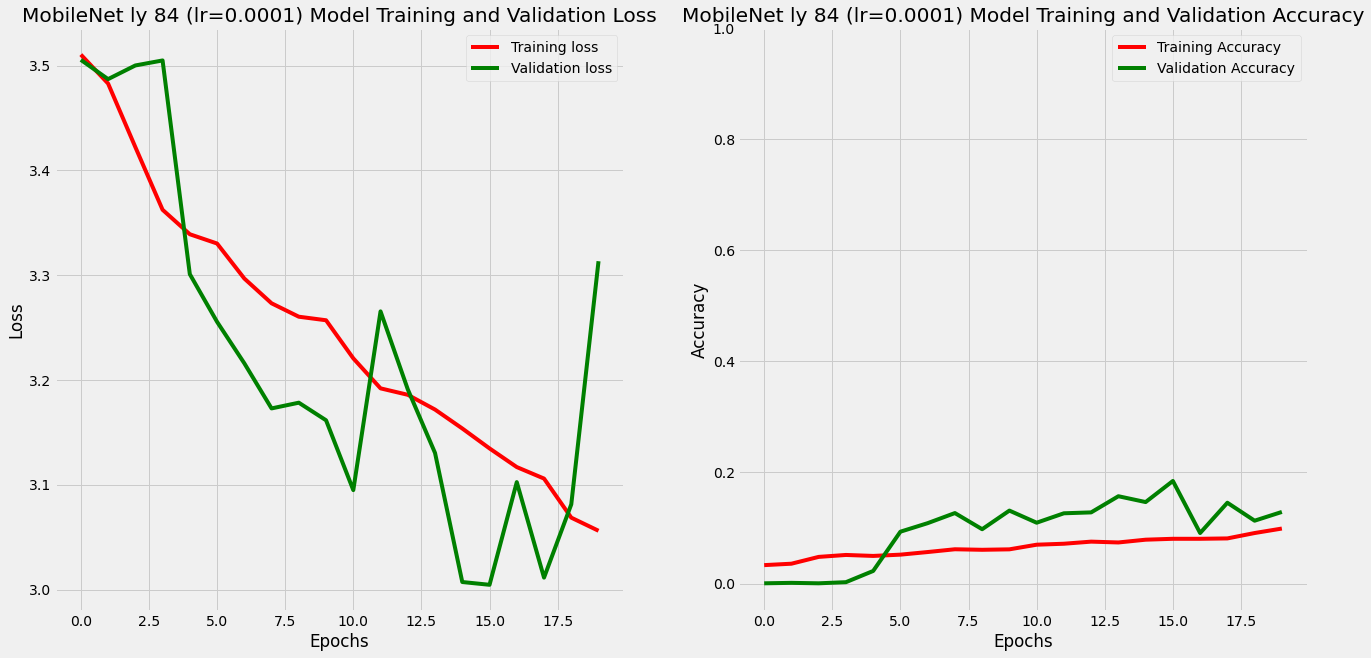

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist4.history["loss"], 'r', label='Training loss')
axes[0].plot(hist4.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('MobileNet ly 84 (lr=0.0001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (hist4.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist4.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('MobileNet ly 84 (lr=0.0001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/MobileNet(lr=0.0001) layer 84 model_accuracy_loss.jpg")

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
num = 1
for layer in base_model.layers:
   if num >= 21:
    layer.trainable = True
   else:
    layer.trainable = False
   num += 1

In [ ]:
model5 = Sequential()
model5.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model5.add(base_model)
model5.add(Conv2D(16, 3, padding='same', activation='relu'))
model5.add(MaxPooling2D(padding='same'))
model5.add(Dropout(0.2))
model5.add(Conv2D(32, 3, padding='same', activation='relu'))
model5.add(MaxPooling2D(padding='same'))
model5.add(Conv2D(64, 3, padding='same', activation='relu'))
model5.add(MaxPooling2D(padding='same'))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dense(33 , activation = 'softmax'))
model5.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001) , metrics=['accuracy'])

In [ ]:
hist5= model5.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 47s 366ms/step - loss: 3.4720 - accuracy: 0.0373 - val_loss: 3.5248 - val_accuracy: 0.0000e+00
Epoch 2/20
117/117 [==============================] - 22s 188ms/step - loss: 3.2313 - accuracy: 0.0807 - val_loss: 3.4565 - val_accuracy: 0.0836
Epoch 3/20
117/117 [==============================] - 22s 189ms/step - loss: 2.8767 - accuracy: 0.1961 - val_loss: 3.4552 - val_accuracy: 0.0291
Epoch 4/20
117/117 [==============================] - 22s 187ms/step - loss: 2.4225 - accuracy: 0.3162 - val_loss: 3.4345 - val_accuracy: 4.0404e-04
Epoch 5/20
117/117 [==============================] - 22s 186ms/step - loss: 1.9777 - accuracy: 0.4395 - val_loss: 3.2734 - val_accuracy: 0.0210
Epoch 6/20
117/117 [==============================] - 22s 187ms/step - loss: 1.6531 - accuracy: 0.5275 - val_loss: 3.1523 - val_accuracy: 0.1188
Epoch 7/20
117/117 [==============================] - 22s 189ms/step - loss: 1.5108 - accuracy: 0.5669 - val_loss: 3.3678 

In [ ]:
model5.evaluate(ds_train), model5.evaluate(ds_valid)

39/39 [==============================] - 3s 70ms/step - loss: 4.6016 - accuracy: 0.1964


([5.547143936157227, 0.12309764325618744],
 [4.601625442504883, 0.1963636428117752])

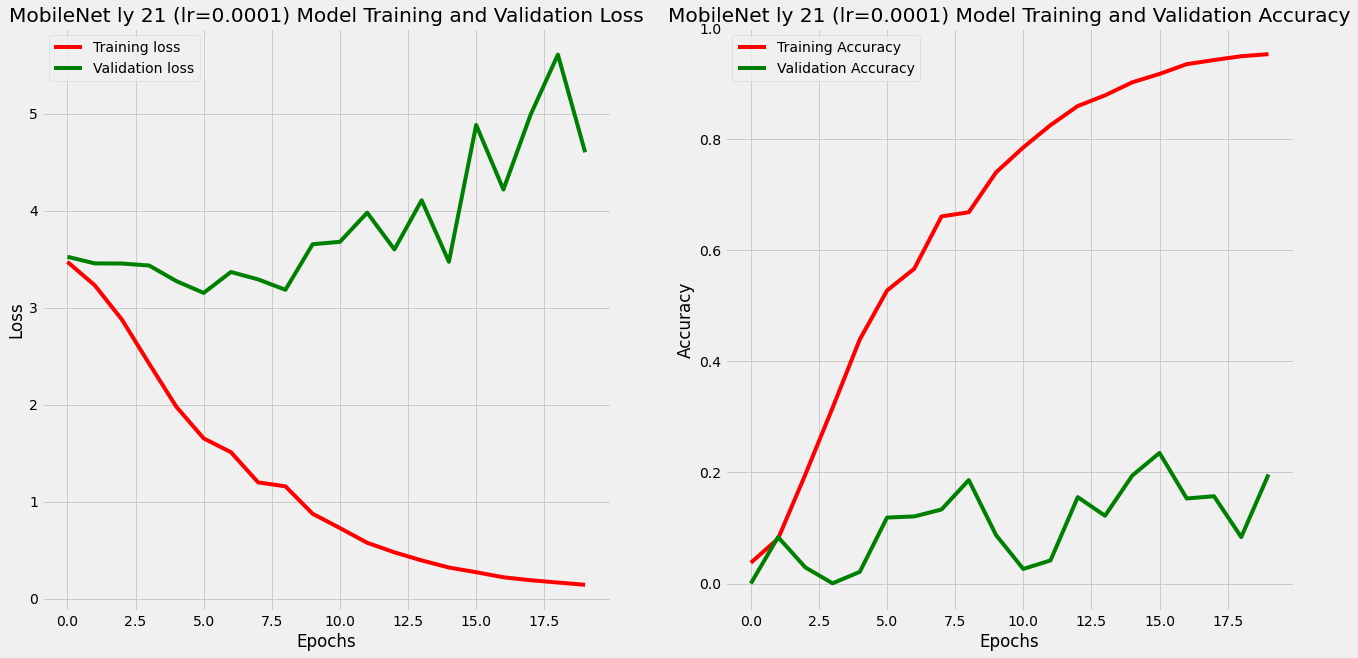

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist5.history["loss"], 'r', label='Training loss')
axes[0].plot(hist5.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('MobileNet ly 21 (lr=0.0001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (hist5.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist5.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('MobileNet ly 21 (lr=0.0001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/MobileNet(lr=0.0001) layer 21 model_accuracy_loss.jpg")

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
num = 1
for layer in base_model.layers:
   if num >= 144:
    layer.trainable = True
   else:
    layer.trainable = False
   num += 1

In [ ]:
model6 = Sequential()
model6.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model6.add(base_model)
model6.add(Conv2D(16, 3, padding='same', activation='relu'))
model6.add(MaxPooling2D(padding='same'))
model6.add(Dropout(0.2))
model6.add(Conv2D(32, 3, padding='same', activation='relu'))
model6.add(MaxPooling2D(padding='same'))
model6.add(Conv2D(64, 3, padding='same', activation='relu'))
model6.add(MaxPooling2D(padding='same'))
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dense(33 , activation = 'softmax'))
model6.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001) , metrics=['accuracy'])

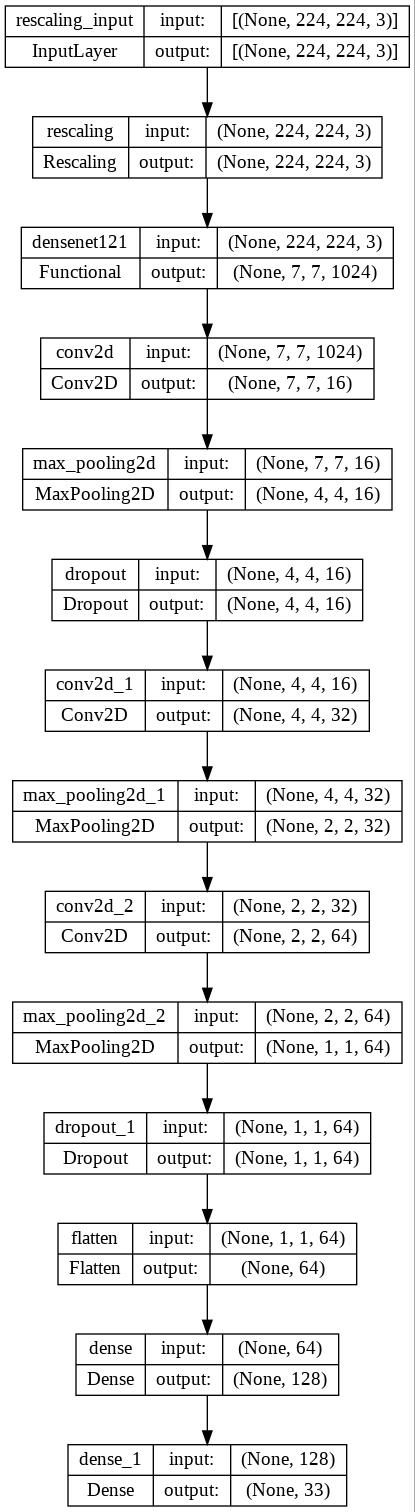

In [ ]:
# Model Architecture
from keras.utils.vis_utils import plot_model
plot_model(model6, to_file='/content/drive/MyDrive/프로젝트/model_plot.jpg', show_shapes=True, show_layer_names=True)

In [ ]:
hist6= model6.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 104s 713ms/step - loss: 3.3694 - accuracy: 0.0703 - val_loss: 3.5023 - val_accuracy: 0.1212
Epoch 2/20
117/117 [==============================] - 73s 625ms/step - loss: 2.7848 - accuracy: 0.2026 - val_loss: 3.5021 - val_accuracy: 0.0368
Epoch 3/20
117/117 [==============================] - 73s 624ms/step - loss: 2.1325 - accuracy: 0.3916 - val_loss: 3.1209 - val_accuracy: 0.1479
Epoch 4/20
117/117 [==============================] - 73s 624ms/step - loss: 1.6332 - accuracy: 0.5379 - val_loss: 1.9518 - val_accuracy: 0.4739
Epoch 5/20
117/117 [==============================] - 73s 622ms/step - loss: 1.2240 - accuracy: 0.6544 - val_loss: 1.1716 - val_accuracy: 0.6848
Epoch 6/20
117/117 [==============================] - 73s 623ms/step - loss: 0.9095 - accuracy: 0.7366 - val_loss: 0.7498 - val_accuracy: 0.7923
Epoch 7/20
117/117 [==============================] - 73s 623ms/step - loss: 0.7026 - accuracy: 0.7946 - val_loss: 0.5852 - val_a

In [ ]:
model6.evaluate(ds_train), model6.evaluate(ds_valid)

39/39 [==============================] - 7s 186ms/step - loss: 0.2673 - accuracy: 0.9402


([0.072153240442276, 0.9791246056556702],
 [0.2673282325267792, 0.940201997756958])

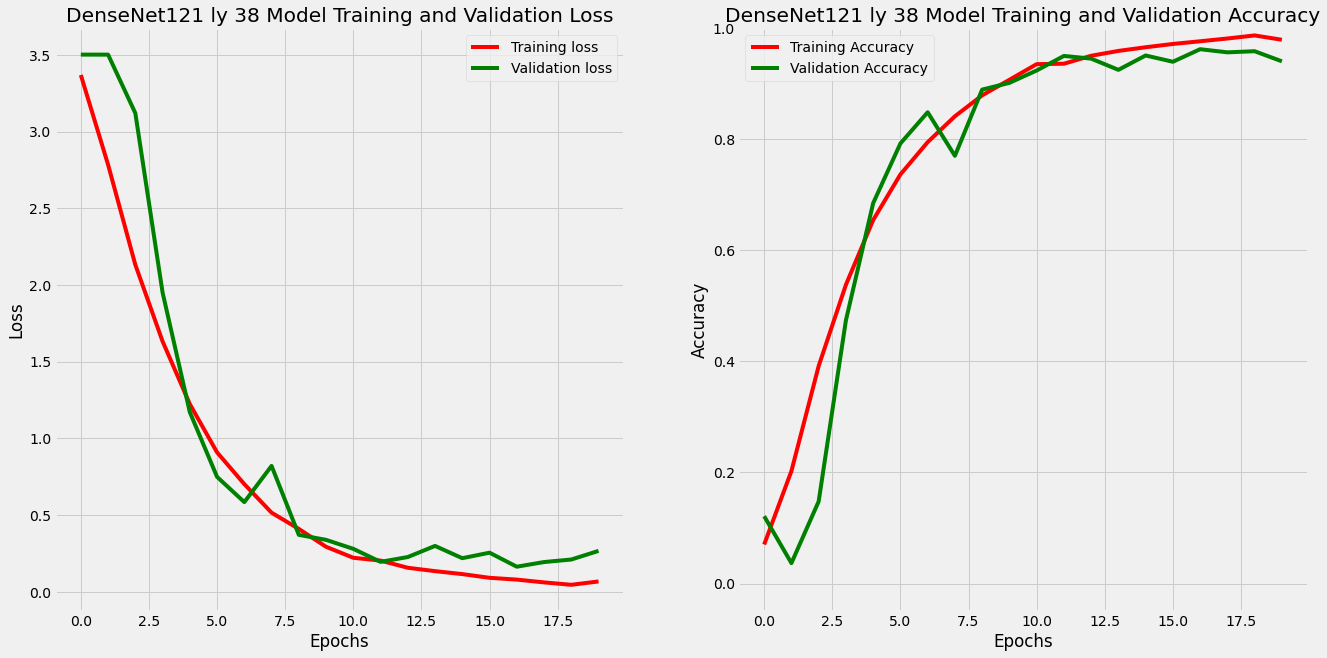

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist6.history["loss"], 'r', label='Training loss')
axes[0].plot(hist6.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('DenseNet121 ly 38 Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (hist6.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist6.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('DenseNet121 ly 38 Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/DenseNet121 layer 38 model_accuracy_loss.jpg")

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
num = 1
for layer in base_model.layers:
   if num >= 59:
    layer.trainable = True
   else:
    layer.trainable = False
   num += 1

In [ ]:
model7 = Sequential()
model7.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model7.add(base_model)
model7.add(Conv2D(16, 3, padding='same', activation='relu'))
model7.add(MaxPooling2D(padding='same'))
model7.add(Dropout(0.2))
model7.add(Conv2D(32, 3, padding='same', activation='relu'))
model7.add(MaxPooling2D(padding='same'))
model7.add(Conv2D(64, 3, padding='same', activation='relu'))
model7.add(MaxPooling2D(padding='same'))
model7.add(Dropout(0.2))
model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dense(33 , activation = 'softmax'))
model7.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001) , metrics=['accuracy'])

In [ ]:
hist7= model7.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

In [ ]:
model7.evaluate(ds_train), model7.evaluate(ds_valid)

In [ ]:
# Visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist6.history["loss"], 'r', label='Training loss')
axes[0].plot(hist6.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('MobileNet ly 59 (lr=0.0001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (hist6.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist6.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('MobileNet ly 59 (lr=0.0001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/MobileNet(lr=0.0001) layer 59 model_accuracy_loss.jpg")